<a href="https://colab.research.google.com/github/SaiRithik24/AD/blob/main/TOYOTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import numpy as np
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

df=pd.read_csv(file_name)
df

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv
Toyoto_Corrola.csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [2]:
df.shape

df.corr(numeric_only=True)

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [3]:
import statsmodels.formula.api as smf


model=smf.ols('Price~KM+Doors+HP+Age_08_04+Gears+Weight',data=df).fit()
model.summary()

model.params

print(model.tvalues, '\n', model.pvalues)

(model.rsquared, model.rsquared_adj)



Intercept    -5.323309
KM          -16.542560
Doors        -0.242055
HP           10.842418
Age_08_04   -46.728942
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
KM            2.238900e-56
Doors         8.087723e-01
HP            2.231791e-26
Age_08_04    4.387432e-290
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


(0.8628024511073656, 0.8622263942190831)

In [5]:
rsq_hp=smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp


6.734721720251469

In [6]:

rsq_W=smf.ols('Price~KM+Age_08_04+Gears+HP+Doors',data=df).fit().rsquared
vif_W=1/(1-rsq_W)
vif_W

5.388708680065659

In [7]:
rsq_G=smf.ols('Price~KM+Age_08_04+HP+Weight+Doors',data=df).fit().rsquared
vif_G=1/(1-rsq_G)
vif_G

7.238427417801379

In [8]:
rsq_KM=smf.ols('Price~HP+Age_08_04+Gears+Weight+Doors',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)
vif_KM

6.117287486560093

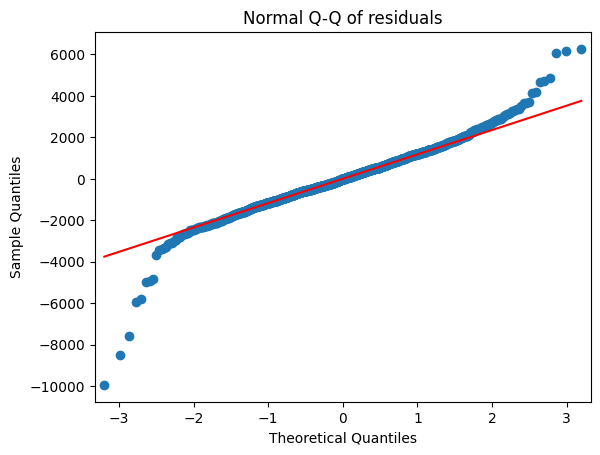

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q of residuals')
plt.show()

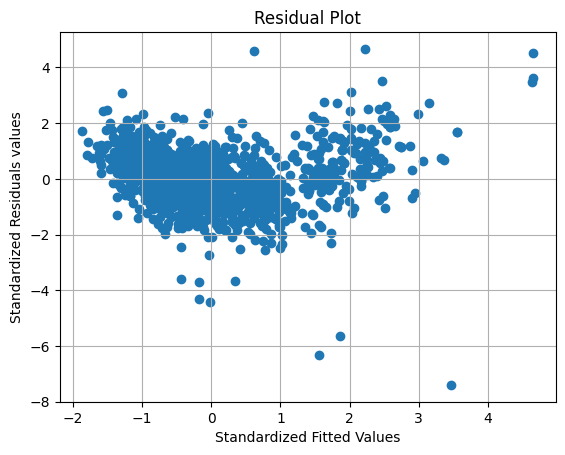

In [10]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals values')
plt.grid(True)
plt.show()

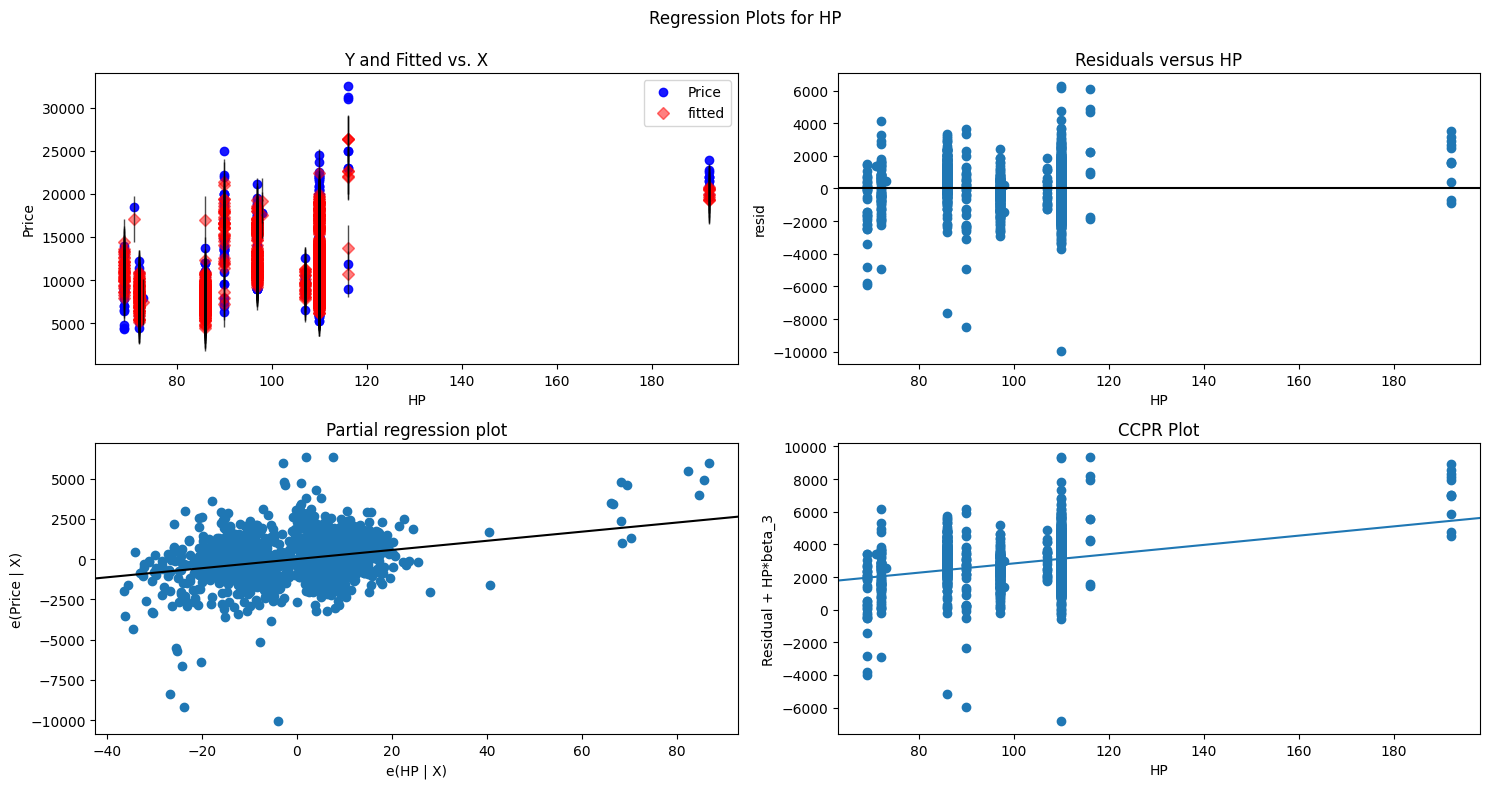

In [11]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
 plt.show()

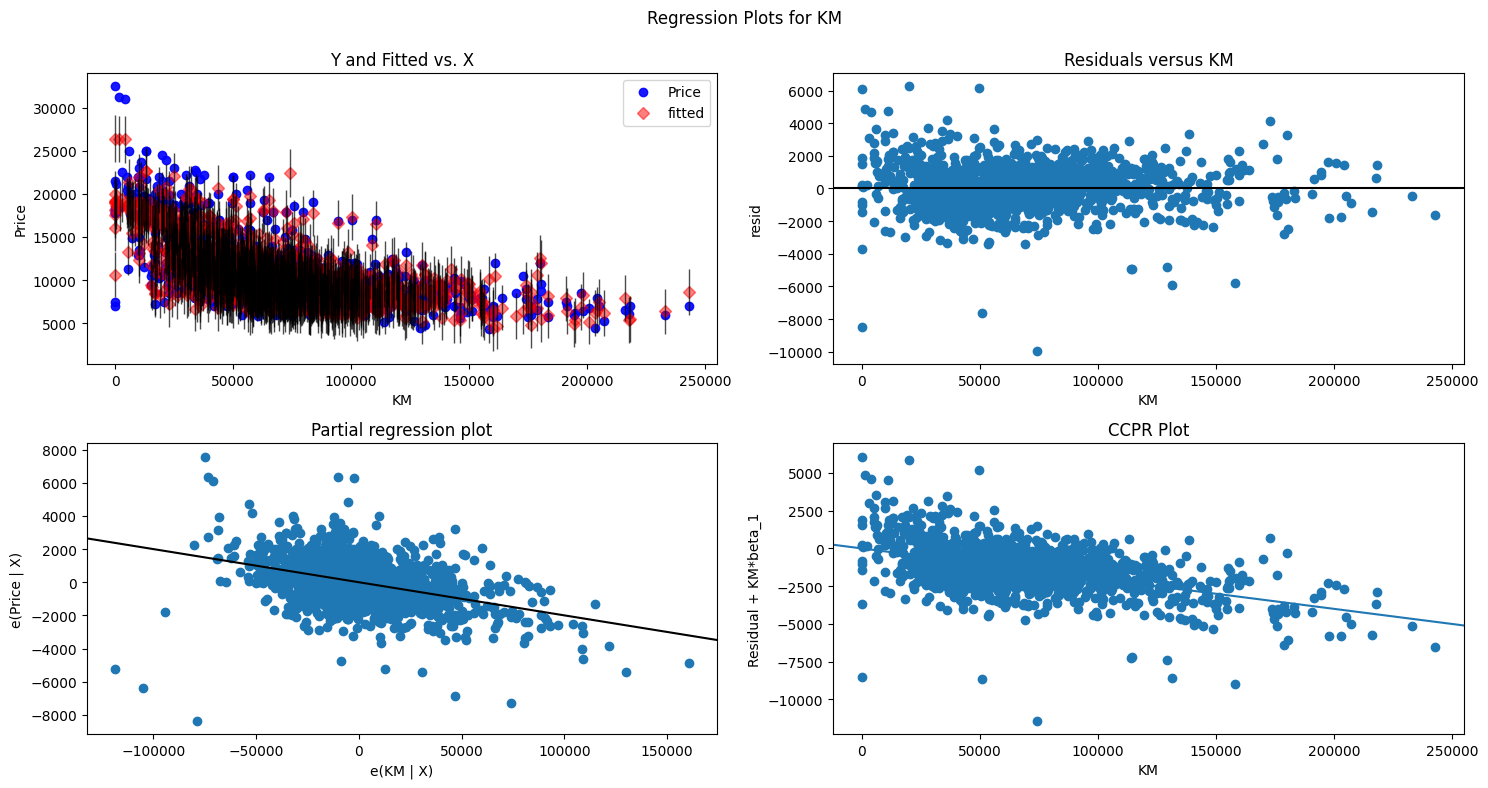

In [12]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
 plt.show()